### Deliverable 1: Preprocessing the Data for a Neural Network

In [416]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [417]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(['EIN','NAME'],axis=1)

In [418]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [419]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

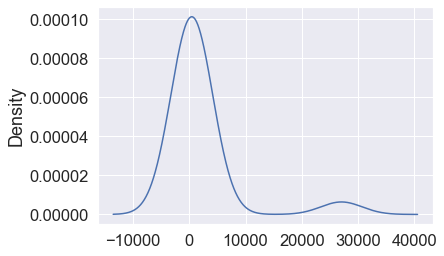

In [420]:
# Visualize the value counts of APPLICATION_TYPE
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts.plot.density()


In [421]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [422]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

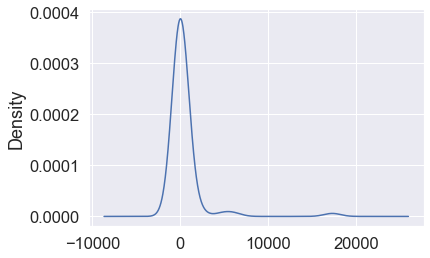

In [423]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [424]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [425]:
# Generate our categorical variable lists
cols = application_df.columns

application_df_numerical = application_df._get_numeric_data().columns

application_cat = list(set(cols) - set(num_cols))

In [426]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()
encode_df.columns.values

array(['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'SPECIAL_CONSIDERATIONS_N',
       'SPECIAL_CONSIDERATIONS_Y', 'INCOME_AMT_0', 'INCOME_AMT_1-9999',
       'INCOME_AMT_10000-24999', 'INCOME_AMT_100000-499999',
       'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation',
       'ORGANIZATION_Trust', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'USE_C

In [427]:
# Merge one-hot encoded features and drop the originals
application_df_encoded = application_df[application_df_numerical].merge(encode_df,left_index=True,right_index=True)
application_df[application_df_numerical].merge(encode_df,left_index=True,right_index=True).head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [428]:
# Split our preprocessed data into our features and target arrays
y=application_df_encoded['IS_SUCCESSFUL'].values
X=application_df_encoded.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [429]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [430]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_243 (Dense)           (None, 80)                3520      
                                                                 
 dense_244 (Dense)           (None, 30)                2430      
                                                                 
 dense_245 (Dense)           (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [431]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [415]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5713 - accuracy: 0.7205
Epoch 2/100
156/804 [====>.........................] - ETA: 0s - loss: 0.5554 - accuracy: 0.7302
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7293
Epoch 3/100
374/804 [============>.................] - ETA: 0s - loss: 0.5523 - accuracy: 0.7330
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7297
Epoch 4/100
567/804 [====================>.........] - ETA: 0s - loss: 0.5562 - accuracy: 0.7295
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7319
Epoch 5/100
766/804 [===========================>..] - ETA: 0s - loss: 0.5517 - accuracy: 0.7328
Epoch 5: saving model to checkpoints/weights.05.hdf5
804/804 [=======================

KeyboardInterrupt: 

In [270]:
### TRIED: OPTIMISATION NUMBER 1: Adding a hidden layer

# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features
hidden_nodes_layer2 = number_input_features/2
hidden_nodes_layer3 = number_input_features/4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third_layer hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 43)                1892      
                                                                 
 dense_130 (Dense)           (None, 21)                924       
                                                                 
 dense_131 (Dense)           (None, 10)                220       
                                                                 
 dense_132 (Dense)           (None, 1)                 11        
                                                                 
Total params: 3,047
Trainable params: 3,047
Non-trainable params: 0
_________________________________________________________________


In [271]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_second_moodel/",exist_ok=True)
checkpoint_path = "checkpoints_second_moodel/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Slight improvement in loss and accuracy from 2 hidden layers

Epoch 1/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5766 - accuracy: 0.7153
Epoch 2/100
234/751 [========>.....................] - ETA: 0s - loss: 0.5566 - accuracy: 0.7208
Epoch 2: saving model to checkpoints_second_moodel/weights.02.hdf5
751/751 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7285
Epoch 3/100
457/751 [=================>............] - ETA: 0s - loss: 0.5533 - accuracy: 0.7280
Epoch 3: saving model to checkpoints_second_moodel/weights.03.hdf5
751/751 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7298
Epoch 4/100
732/751 [============================>.] - ETA: 0s - loss: 0.5510 - accuracy: 0.7300
Epoch 4: saving model to checkpoints_second_moodel/weights.04.hdf5
751/751 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7303
Epoch 5/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7302
Epoch 6/100
240/751 [========>.........

751/751 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7403
Epoch 77/100
751/751 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7403
Epoch 78/100
156/751 [=====>........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.7282
Epoch 78: saving model to checkpoints_second_moodel/weights.78.hdf5
751/751 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7396
Epoch 79/100
390/751 [==============>...............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7381
Epoch 79: saving model to checkpoints_second_moodel/weights.79.hdf5
751/751 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7402
Epoch 80/100
653/751 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7413
Epoch 80: saving model to checkpoints_second_moodel/weights.80.hdf5
751/751 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7401
Epoch 81/100
751/751 [======================

In [432]:
## TRIED RANDOM FOREST CLASSIFIER and FIGURED OUT IMPORTANT VARIABLES AND REMOVED VARIABLES ONE AT AT A TIME
# Create a random forest classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)


application_df_encoded = application_df[application_df_numerical].merge(encode_df,left_index=True,right_index=True)

# Split our preprocessed data into our features and target arrays
y=application_df_encoded['IS_SUCCESSFUL'].values
X=application_df_encoded.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=78,stratify=y)


# Fit the StandardScaler
X_scaler = scaler.fit(X_train)


# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

importances = rf_model.feature_importances_
importances = np.sort(importances)
i=0
for each_col in X.columns:
    print(f'{each_col}: {importances[i]}')
    i=i+1


# feature_names = application_df_encoded.columns.values[1:]
# print(feature_names)
# importances = rf_model.feature_importances_
# print(importances)
# index_of_importances = sorted(range(len(importances)), key=lambda i: importances[i])[:10] #Bottom 10

# list_of_top_ten_feature_name = [feature_names[index] for index in index_of_importances]
# list_of_top_ten_feature_values = [importances[index] for index in index_of_importances]

# forest_importances = pd.Series(list_of_top_ten_feature_values, index=list_of_top_ten_feature_name)
# std = np.std([sorted(tree.feature_importances_)[:10] for tree in rf_model.estimators_], axis=0)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()


 Random forest predictive accuracy: 0.713
STATUS: 7.705044082732246e-05
ASK_AMT: 9.272565967985938e-05
APPLICATION_TYPE_Other: 0.00010333497853563407
APPLICATION_TYPE_T10: 0.00022823552747817184
APPLICATION_TYPE_T19: 0.0005201602465365008
APPLICATION_TYPE_T3: 0.0005277997480901954
APPLICATION_TYPE_T4: 0.0005558860090719836
APPLICATION_TYPE_T5: 0.0006909120833992099
APPLICATION_TYPE_T6: 0.0010246203843796682
APPLICATION_TYPE_T7: 0.0013499193048324008
APPLICATION_TYPE_T8: 0.00173260074554299
SPECIAL_CONSIDERATIONS_N: 0.002021683711720676
SPECIAL_CONSIDERATIONS_Y: 0.002062629663027051
INCOME_AMT_0: 0.0029450246235686274
INCOME_AMT_1-9999: 0.002969334557777717
INCOME_AMT_10000-24999: 0.003189043577126775
INCOME_AMT_100000-499999: 0.0035340894269405344
INCOME_AMT_10M-50M: 0.004049538808522667
INCOME_AMT_1M-5M: 0.004884428307084271
INCOME_AMT_25000-99999: 0.006122533947956091
INCOME_AMT_50M+: 0.00617007729982418
INCOME_AMT_5M-10M: 0.006279083836100303
CLASSIFICATION_C1000: 0.0075873907755667

# Remove Status and ASK amount

In [436]:
application_df_cleaned = application_df.drop(['ASK_AMT','STATUS'], axis=1)
application_df_cleaned.nunique()

application_counts = application_df_cleaned.APPLICATION_TYPE.value_counts()
replace_application = list(application_counts[application_counts < 550].index)

# Replace in dataframe
for app in replace_application:
    application_df_cleaned.APPLICATION_TYPE = application_df_cleaned.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
print(application_df_cleaned.APPLICATION_TYPE.value_counts())


classification_counts = application_df_cleaned['CLASSIFICATION'].value_counts()
print(classification_counts)
# # Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df_cleaned.CLASSIFICATION = application_df_cleaned.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
print(application_df_cleaned.CLASSIFICATION.value_counts())


# use_case_counts = application_df_cleaned['USE_CASE'].value_counts()
# print(use_case_counts)
# # # Determine which values to replace if counts are less than ..?
# replace_class_use = list(use_case_counts[use_case_counts < 400].index)


# use_case_counts = application_df_cleaned['USE_CASE'].value_counts()
# print(use_case_counts)
# # # Determine which values to replace if counts are less than ..?
# replace_class_use = list(use_case_counts[use_case_counts < 400].index)

# # Replace in dataframe
# for cls in replace_class_use:
#     application_df_cleaned.USE_CASE = application_df_cleaned.USE_CASE.replace(cls,"Other")
    
# # Check to make sure binning was successful
# print(application_df_cleaned.USE_CASE.value_counts())



cols = application_df_cleaned.columns

application_df_numerical = application_df_cleaned._get_numeric_data().columns

application_cat = list(set(cols) - set(num_cols))

# Fit and transform the OneHotEncoder using the categorical variable list
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(application_df_cleaned[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()
#encode_df.columns.values


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64
C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,...,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [437]:
# Merge one-hot encoded features and drop the originals
application_df_encoded = application_df_cleaned[application_df_numerical].merge(encode_df,left_index=True,right_index=True)
# Split our preprocessed data into our features and target arrays
y=application_df_encoded['IS_SUCCESSFUL'].values
X=application_df_encoded.drop(['IS_SUCCESSFUL'],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [438]:
## TRIAL 3: Trying with less features

# # Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  number_input_features
hidden_nodes_layer2 = number_input_features/2
hidden_nodes_layer3 = number_input_features/4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third_layer hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



# Define the checkpoint path and filenames
os.makedirs("checkpoints_third_moodel/",exist_ok=True)
checkpoint_path = "checkpoints_third_moodel/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)


# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")
print("")
print("")
# importances = rf_model.feature_importances_
# importances = np.sort(importances)
# i=0
# for each_col in X.columns:
#     print(f'{each_col}: {importances[i]}')
#     i=i+1


# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_250 (Dense)           (None, 38)                1482      
                                                                 
 dense_251 (Dense)           (None, 19)                741       
                                                                 
 dense_252 (Dense)           (None, 9)                 180       
                                                                 
 dense_253 (Dense)           (None, 1)                 10        
                                                                 
Total params: 2,413
Trainable params: 2,413
Non-trainable params: 0
_________________________________________________________________
 Random forest predictive accuracy: 0.729
Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5816 - accuracy: 0.7097
Epoch 2/100
194/804 [======>............

804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7335
Epoch 34/100
443/804 [===============>..............] - ETA: 0s - loss: 0.5451 - accuracy: 0.7376
Epoch 34: saving model to checkpoints_third_moodel/weights.34.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7334
Epoch 35/100
660/804 [=======================>......] - ETA: 0s - loss: 0.5482 - accuracy: 0.7317
Epoch 35: saving model to checkpoints_third_moodel/weights.35.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5465 - accuracy: 0.7332
Epoch 36/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7336
Epoch 37/100
 39/804 [>.............................] - ETA: 1s - loss: 0.5619 - accuracy: 0.7220
Epoch 37: saving model to checkpoints_third_moodel/weights.37.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5460 - accuracy: 0.7338
Epoch 38/100
230/804 [=======>.................

## Random forest accuracy improved after removing noisy variables to 0.729, similar results from deep learning model